In [1]:
from keras.datasets import reuters
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
from keras.preprocessing import sequence
from keras.utils import np_utils

import numpy
import tensorflow as tf
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)

(X_train, Y_train), (X_test, Y_test) = reuters.load_data(num_words=1000, test_split=0.2)

category = numpy.max(Y_train) + 1

2113536/2110848 [==============================] - 2s 1us/step


In [3]:
print('category:', category)
print('X_train len:',len(X_train))
print('Y_train len:',len(Y_train))
print(X_train[0])

category: 46
X_train len: 8982
Y_train len: 8982
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [0]:
x_train = sequence.pad_sequences(X_train, maxlen=100)
x_test = sequence.pad_sequences(X_test, maxlen=100)

y_train = np_utils.to_categorical(Y_train)
y_test = np_utils.to_categorical(Y_test)

In [0]:
model = Sequential()
model.add(Embedding(1000, 100))
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46, activation='softmax'))

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
history = model.fit(x_train, y_train, batch_size=100, epochs=20, validation_data=(x_test, y_test))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 8982 samples, validate on 2246 samples
Epoch 1/20
8982/8982 [==============================] - 19s 2ms/step - loss: 2.5576 - accuracy: 0.3717 - val_loss: 2.0103 - val_accuracy: 0.4920
Epoch 2/20
8982/8982 [==============================] - 17s 2ms/step - loss: 1.9195 - accuracy: 0.4982 - val_loss: 1.8625 - val_accuracy: 0.5227
Epoch 3/20
8982/8982 [==============================] - 17s 2ms/step - loss: 1.7713 - accuracy: 0.5355 - val_loss: 1.7812 - val_accuracy: 0.5249
Epoch 4/20
8982/8982 [==============================] - 17s 2ms/step - loss: 1.6980 - accuracy: 0.5593 - val_loss: 1.7023 - val_accuracy: 0.5730
Epoch 5/20
8982/8982 [==============================] - 17s 2ms/step - loss: 1.6048 - accuracy: 0.5878 - val_loss: 1.6325 - val_accuracy: 0.5859
Epoch 6/20
8982/8982 [==============================] - 17s 2ms/step - loss: 1.5056 - accuracy: 0.6173 - val_loss: 1.5387 - val_accuracy: 0.6180
Epoch 7/20
8982/8982 [==============================] - 17s 2ms/step - loss: 1.402

In [8]:
print('\n Test Accuracy:%.4f' %(model.evaluate(x_test, y_test)[1]))

2246/2246 [==============================] - 1s 494us/step

 Test Accuracy:0.7110


In [0]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

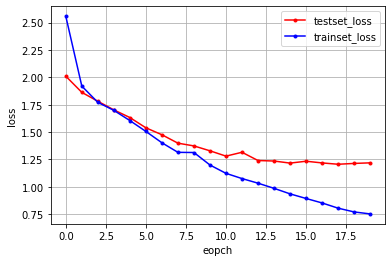

In [10]:
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('eopch')
plt.ylabel('loss')
plt.show()

In [0]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Conv1D, MaxPooling1D
from keras.datasets import imdb

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [0]:
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

In [16]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=5000)

x_train = sequence.pad_sequences(x_train, maxlen=100)
x_test = sequence.pad_sequences(x_test, maxlen=100)

17465344/17464789 [==============================] - 3s 0us/step


In [0]:
model = Sequential()
model.add(Embedding(5000, 100))
model.add(Dropout(0.5))
model.add(Conv1D(64, 5, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [20]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 100)         500000    
_________________________________________________________________
dropout_2 (Dropout)          (None, None, 100)         0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, None, 64)          32064     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, None, 64)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 55)                26400     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 56        
_________________________________________________________________
activation_1 (Activation)    (None, 1)                

In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
history = model.fit(x_train, y_train, batch_size=100, epochs=5, validation_data=(x_test, y_test))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 20s 811us/step - loss: 0.4583 - accuracy: 0.7632 - val_loss: 0.3369 - val_accuracy: 0.8544
Epoch 2/5
25000/25000 [==============================] - 15s 597us/step - loss: 0.2958 - accuracy: 0.8760 - val_loss: 0.3225 - val_accuracy: 0.8590
Epoch 3/5
25000/25000 [==============================] - 15s 592us/step - loss: 0.2512 - accuracy: 0.8997 - val_loss: 0.3229 - val_accuracy: 0.8592
Epoch 4/5
25000/25000 [==============================] - 15s 603us/step - loss: 0.2172 - accuracy: 0.9148 - val_loss: 0.3588 - val_accuracy: 0.8476
Epoch 5/5
25000/25000 [==============================] - 15s 597us/step - loss: 0.1805 - accuracy: 0.9312 - val_loss: 0.3507 - val_accuracy: 0.8540


In [23]:
print('\n test accuracy:%.4f'%(model.evaluate(x_test, y_test)[1]))

25000/25000 [==============================] - 4s 173us/step

 test accuracy:0.8540


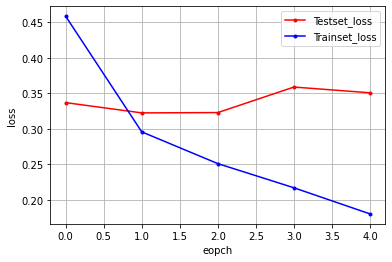

In [24]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('eopch')
plt.ylabel('loss')
plt.show()